In [ ]:
!pip install pycaret
#!pip install pycaret[tuners]

In [ ]:
#!pip install utils

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import pickle
import importlib
import utils
importlib.reload(utils)
from pycaret.classification import *
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from utils import *

%matplotlib inline

In [ ]:
# GLOBAL VAR
PATH = './'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Big Data Assignment/Assignment 1'
df.head()

/content/drive/MyDrive/Big Data Assignment/Assignment 1


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_missing
0,140000,2,2.0,2,35,0,0,0,0,0,...,95301.0,96653.0,3280.0,4270.0,3500.0,3606.0,3500.0,3550.0,0,0
1,40000,2,3.0,1,24,1,8,7,6,5,...,23635.0,22680.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,50000,1,3.0,1,51,-1,-1,-1,-1,-1,...,0.0,0.0,13902.0,42863.0,8500.0,0.0,0.0,0.0,0,0
3,90000,2,1.0,2,29,-1,-1,-1,-1,0,...,1888.0,0.0,6198.0,200.0,3199.0,0.0,0.0,0.0,0,0
4,50000,1,2.0,3,52,0,0,0,0,0,...,9953.0,9567.0,2500.0,1500.0,1300.0,800.0,1000.0,1500.0,0,0


In [ ]:
cust_pipeline = Pipeline([
    ( 'GenerateMissingIndicator: EDUCATION', GenerateMissingIndicator(['EDUCATION']) ),
    ( 'GroupRareLevels: EDUCATION, MARRIAGE', GroupRareLevels(feat_lst=['EDUCATION', 'MARRIAGE']) ),
    ( 'OutlierRemovalIQR: AGE, LIMIT_BAL', OutlierRemovalIQR(['AGE', 'LIMIT_BAL']) )
])

---- GenerateMissingIndicator init method ----
Features : ['EDUCATION']
---- GroupRareLevels init method ----
0.01
---- OutlierRemovalIQR init method ----
Features : {'AGE': [], 'LIMIT_BAL': []}


In [ ]:
df_new = cust_pipeline.fit_transform(df)

---- GenerateMissingIndicator fit method ----
---- GenerateMissingIndicator transform method ----
---- GroupRareLevels fit method ----
EDUCATION
{2.0: 0.4702949289200085, 1.0: 0.35269467430511353, 3.0: 0.16141523445788244, 'other': 0.015595162316995544}
MARRIAGE
{2: 0.5366485229614755, 1: 0.4510384188553612, 3: 0.010569148655075834, 'other': 0.0017439095280875126}
Features : {'EDUCATION': [], 'MARRIAGE': ['other']}
---- GroupRareLevels transform method ----
---- OutlierRemovalIQR fit method ----
Features : {'AGE': [8.5, 60.5], 'LIMIT_BAL': [-235000.0, 525000.0]}
---- OutlierRemovalIQR transform method ----


In [ ]:
# Save custom pipeline
filename = PATH+'cust_pipe.pkl'
with open(filename, "wb") as f:
    pickle.dump(cust_pipeline, f)

In [ ]:
df_new['EDUCATION'].value_counts(normalize=True)

2.0      0.470295
1.0      0.352695
3.0      0.161415
other    0.015595
Name: EDUCATION, dtype: float64

In [ ]:
df_new['MARRIAGE'].value_counts(normalize=True)

2        0.536649
1        0.451038
3        0.010569
other    0.001744
Name: MARRIAGE, dtype: float64

<Axes: >

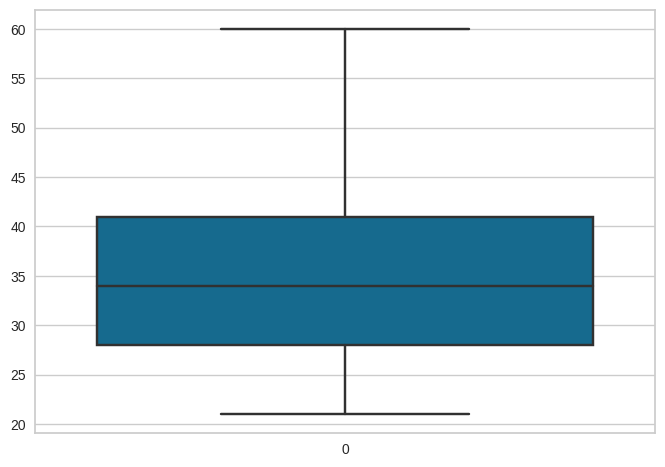

In [ ]:
sns.boxplot(df_new['AGE'])

<Axes: >

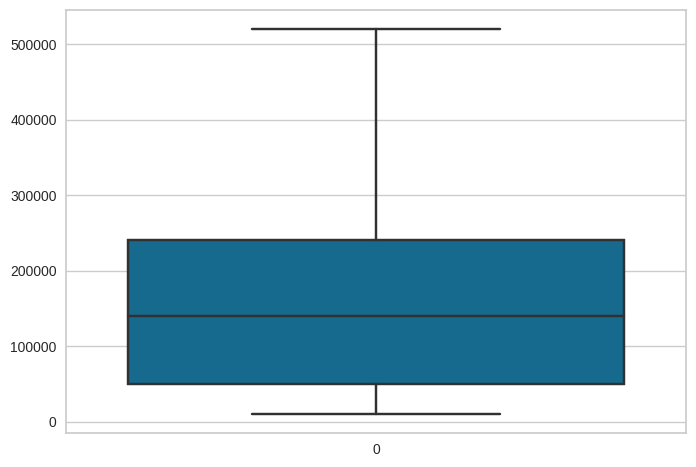

In [ ]:
sns.boxplot(df_new['LIMIT_BAL'])

In [ ]:
df_new.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_missing'],
      dtype='object')

In [ ]:
# Let's train some models

In [ ]:
clf_exp = setup(
    data = df_new,
    target='default',
    fold=5,
    normalize=True,
    transformation=True,
    ignore_features=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
    # log_experiment = True, experiment_name = 'baseline'
)

AttributeError: ignored